<a href="https://colab.research.google.com/github/pipit20/Project-1/blob/main/Indonesian_Minimum_Wage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression

data = pd.read_csv("/content/Indonesian Salary by Region (1997-2025).csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   REGION  983 non-null    object 
 1   SALARY  983 non-null    float64
 2   YEAR    983 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.2+ KB


In [ ]:
data.head()

,REGION,SALARY,YEAR
0,ACEH,128000.0,1997
1,SUMATERA UTARA,151000.0,1997
2,SUMATERA BARAT,119000.0,1997
3,RIAU,151500.0,1997
4,JAMBI,119500.0,1997


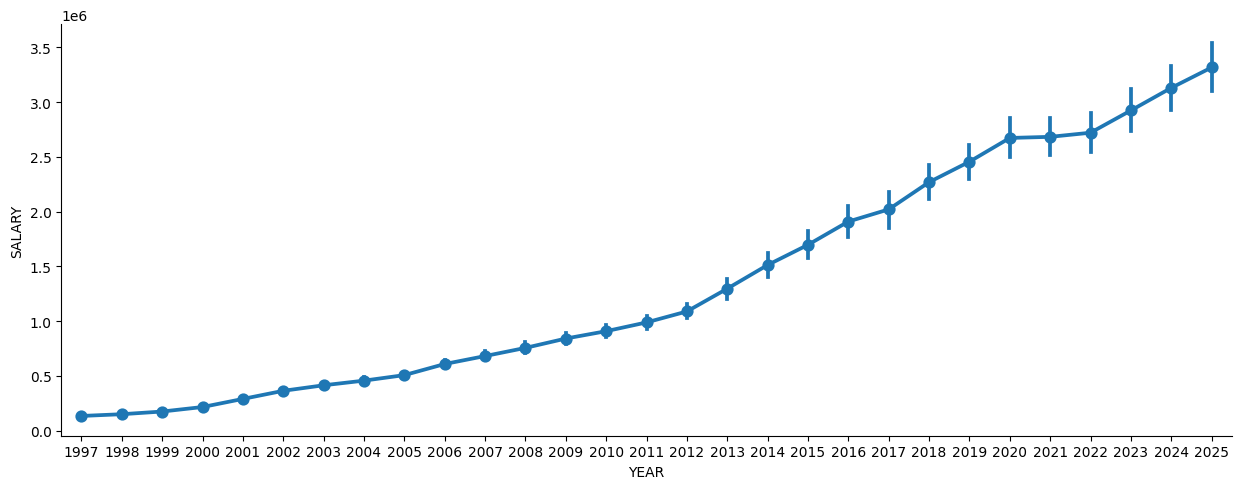

In [ ]:
sns.catplot(x='YEAR', y='SALARY', data=data, kind='point', aspect=2.5)

In [ ]:
avg = data.groupby('YEAR', as_index=False)['SALARY'].mean().rename(columns={'SALARY': 'AVG_SALARY'})

In [ ]:
print(avg.head())

   YEAR     AVG_SALARY
0  1997  134964.285714
1  1998  150937.500000
2  1999  175390.625000
3  2000  216506.250000
4  2001  290487.500000


In [ ]:
print(avg.columns)

Index(['YEAR', 'AVG_SALARY'], dtype='object')


In [ ]:
growth = [0]
for i in range(1, len(avg)):
    growth.append(avg["AVG_SALARY"].iloc[i] - avg["AVG_SALARY"].iloc[i-1])

avg["growth"] = growth

In [ ]:
avg.head()

,YEAR,AVG_SALARY,growth
0,1997,134964.285714,0.000000
1,1998,150937.500000,15973.214286
2,1999,175390.625000,24453.125000
3,2000,216506.250000,41115.625000
4,2001,290487.500000,73981.250000


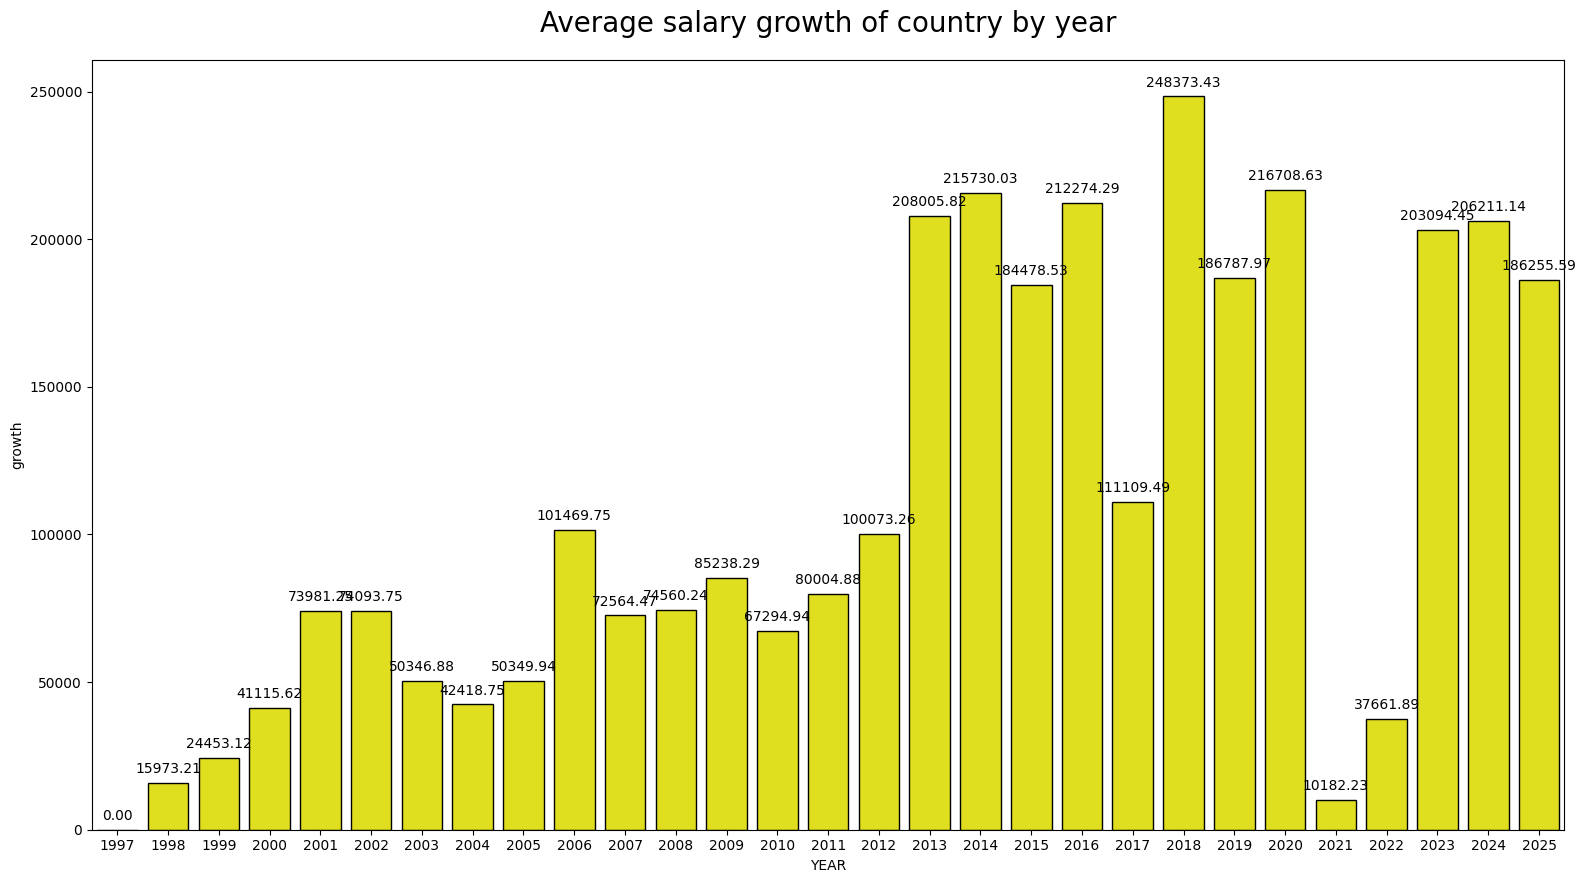

In [ ]:
plt.figure(figsize=(19,10))
plt.title("Average salary growth of country by year", size=20, pad=20)

ax = sns.barplot(x='YEAR', y='growth', data=avg, color='yellow', edgecolor="black")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

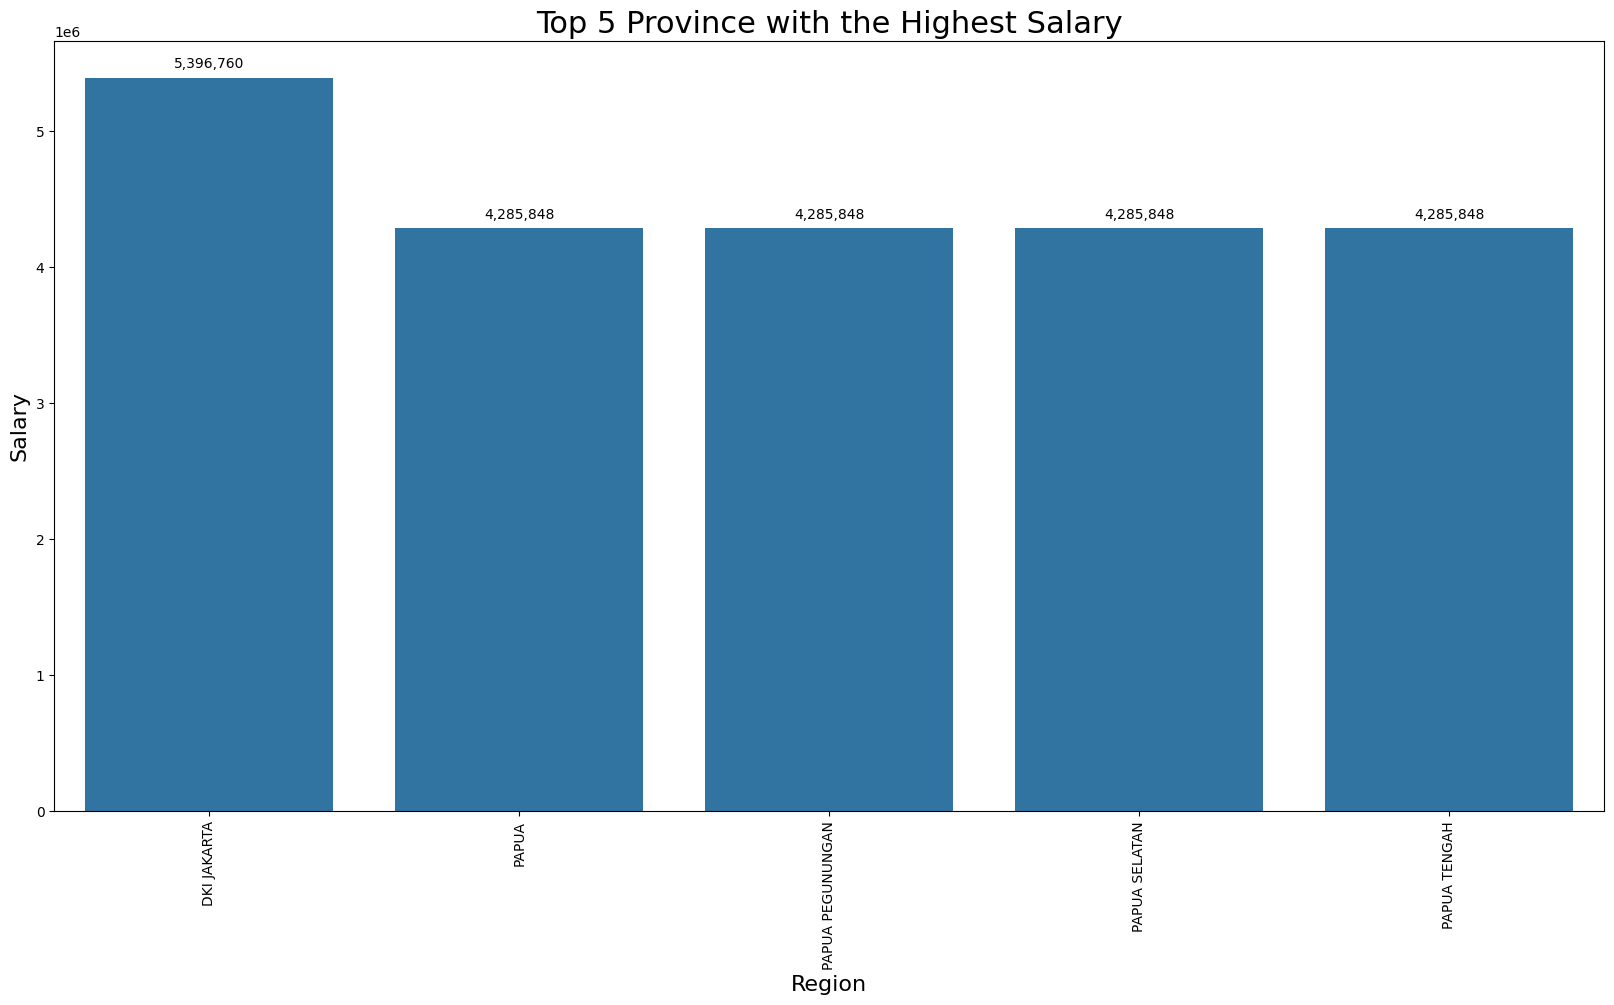

In [ ]:
top_5_regions = data.groupby('REGION')['SALARY'].max().sort_values(ascending=False)[:5]
top_5_regions = top_5_regions.reset_index()

plt.figure(figsize = (20, 10))
graph = sns.barplot(x = 'REGION', y = 'SALARY', data=top_5_regions, order=top_5_regions['REGION'])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.xlabel('Region', fontsize=16)
plt.ylabel('Salary', fontsize=16)
plt.title('Top 5 Province with the Highest Salary', fontsize=22)

for index, row in top_5_regions.iterrows():
    graph.annotate(format(int(row['SALARY']), ','),
                   (row.name, row['SALARY']),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

In [ ]:
data = data.reset_index(drop=True).groupby('REGION').apply(lambda x: x.sort_values('YEAR'))

models = {}
for provinsi in data['REGION'].unique():
    X = data.loc[data['REGION'] == provinsi]['YEAR'].values.reshape(-1, 1)
    y = data.loc[data['REGION'] == provinsi]['SALARY'].values.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    models[provinsi] = model

In [ ]:
future_years = np.arange(data['YEAR'].max() + 1, data['YEAR'].max() + 6).reshape(-1, 1)

future_ump = []

for provinsi in data['REGION'].unique():
    model = models[provinsi]
    future_ump_provinsi = model.predict(future_years)

    df_future = pd.DataFrame({
        "YEAR": future_years.ravel(),
        "REGION": [provinsi] * len(future_years),
        "PREDICTED_SALARY": future_ump_provinsi.ravel()
    })

    future_ump.append(df_future)

future_ump_df = pd.concat(future_ump, ignore_index=True)

print(future_ump_df.head())


   YEAR REGION  PREDICTED_SALARY
0  2026   ACEH      3.651537e+06
1  2027   ACEH      3.788426e+06
2  2028   ACEH      3.925315e+06
3  2029   ACEH      4.062204e+06
4  2030   ACEH      4.199093e+06


In [ ]:
future_df['SALARY'] = future_df['SALARY'].astype(int)
future_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   REGION  210 non-null    object
 1   YEAR    210 non-null    int64 
 2   SALARY  210 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.1+ KB


In [ ]:
future_df.head()

,REGION,YEAR,SALARY
0,ACEH,2026,3651536
1,ACEH,2027,3788425
2,ACEH,2028,3925314
3,ACEH,2029,4062204
4,ACEH,2030,4199093


In [ ]:
combined_df = pd.concat([data, future_df],axis=0,ignore_index=True)

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   REGION  1193 non-null   object 
 1   SALARY  1193 non-null   float64
 2   YEAR    1193 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 28.1+ KB


In [ ]:
combined_df.head()

,REGION,SALARY,YEAR
0,ACEH,128000.0,1997
1,ACEH,147000.0,1998
2,ACEH,171000.0,1999
3,ACEH,265000.0,2000
4,ACEH,300000.0,2001


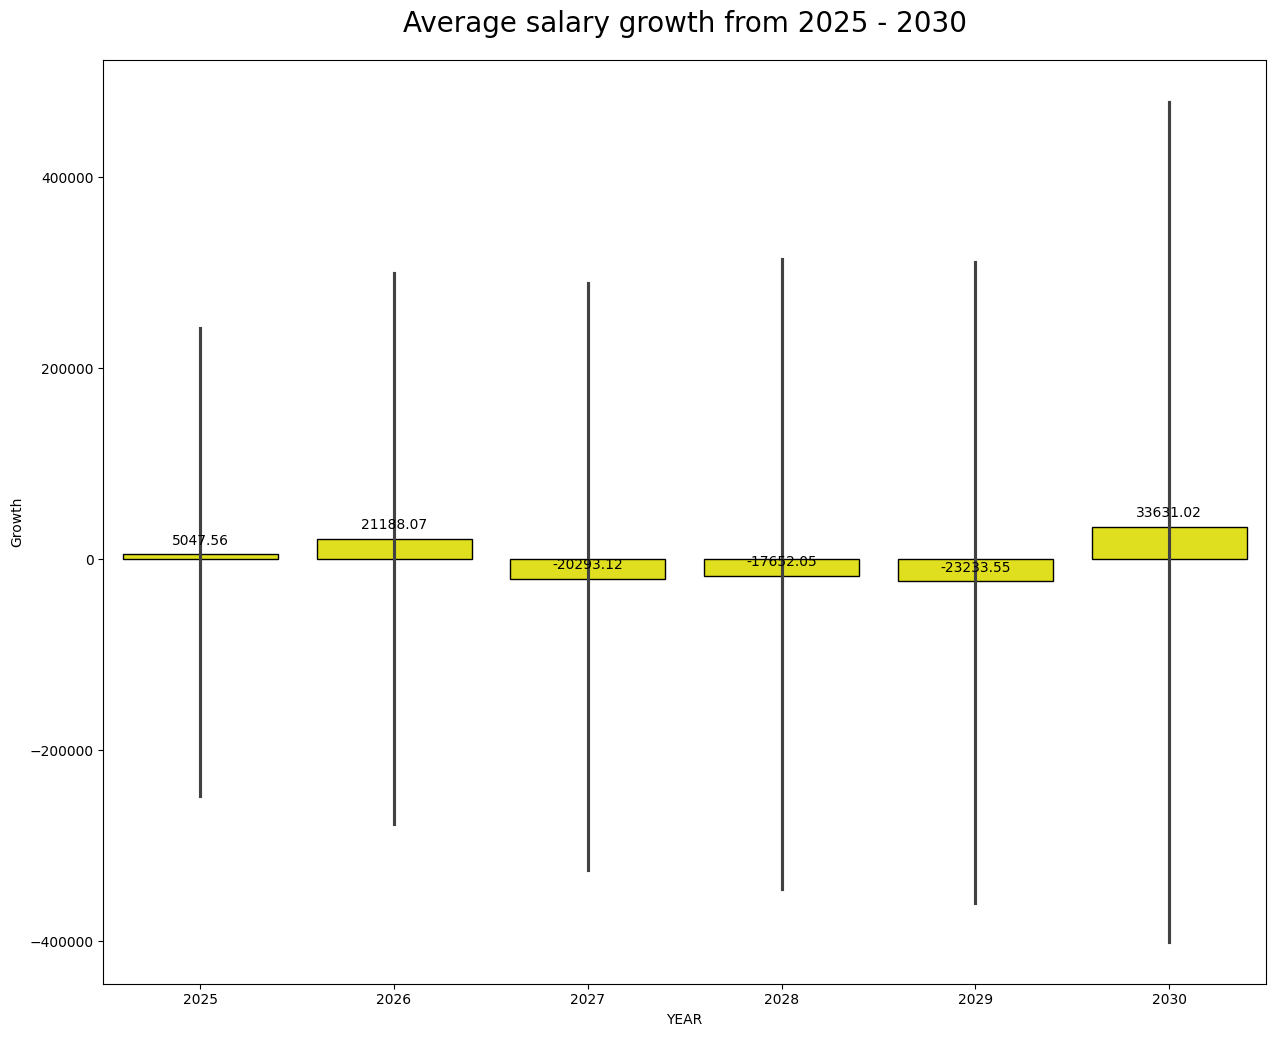

In [ ]:
AVG = combined_df.sort_values(by='YEAR', ascending=True)

AVG['Growth'] = [0] + [AVG['SALARY'].iloc[i] - AVG['SALARY'].iloc[i-1] for i in range(1, len(AVG))]

plt.figure(figsize=(15,12))
plt.title("Average salary growth from 2025 - 2030", size=20, pad=20)

AVG_filtered = AVG.query('YEAR >= 2025 and YEAR <= 2030')

ax = sns.barplot(x='YEAR', y='Growth', data=AVG_filtered, color='yellow', edgecolor="black")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

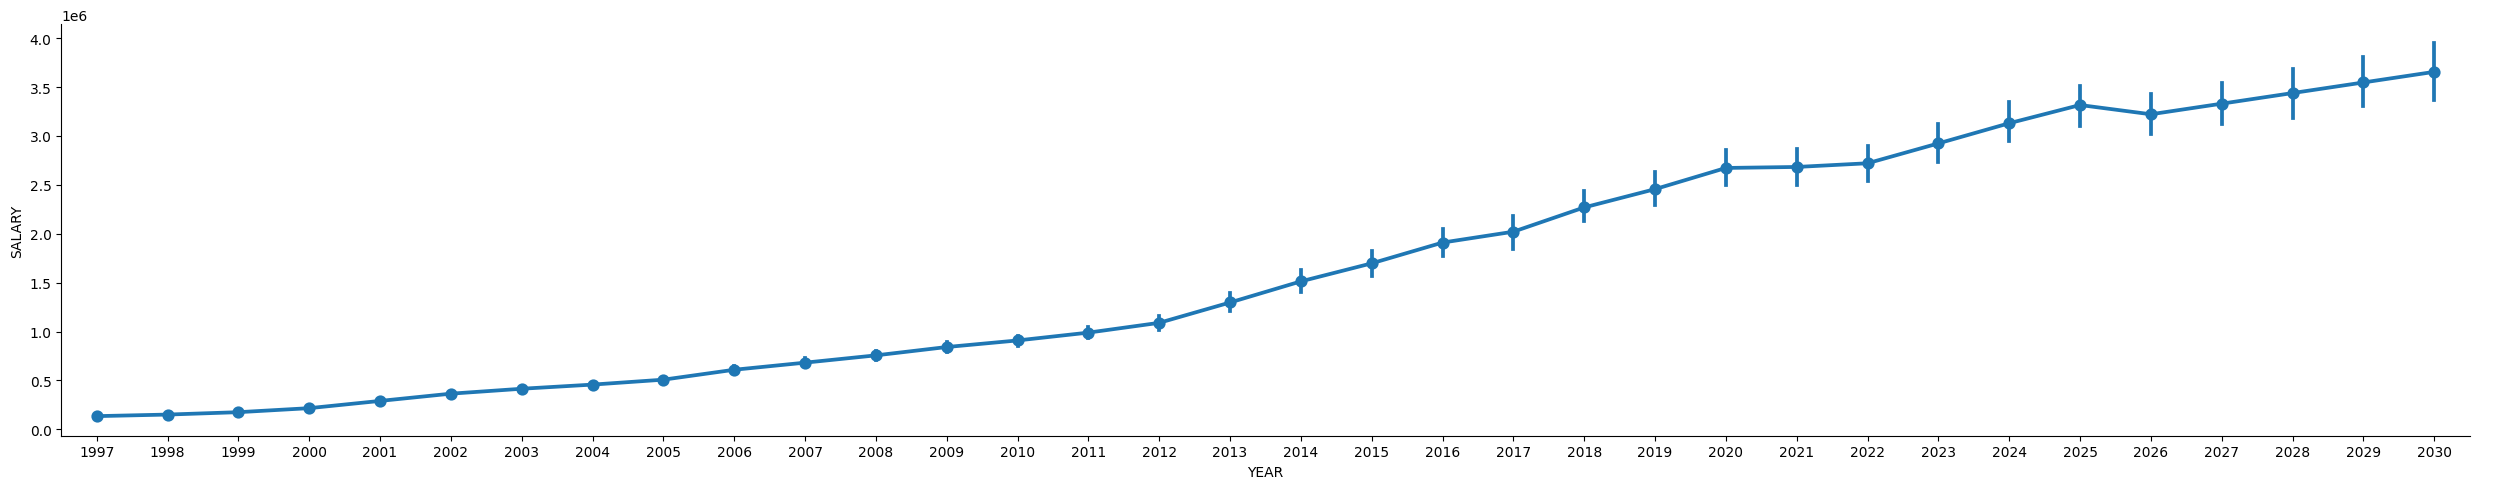

In [ ]:
sns.catplot(x='YEAR', y='SALARY', data=combined_df, kind='point', aspect=5)

In [ ]:
import plotly.express as px

fig = px.bar(combined_df, x='REGION', y="SALARY",color="REGION",
  animation_frame="YEAR", range_y=[0,3000000])
fig.show()

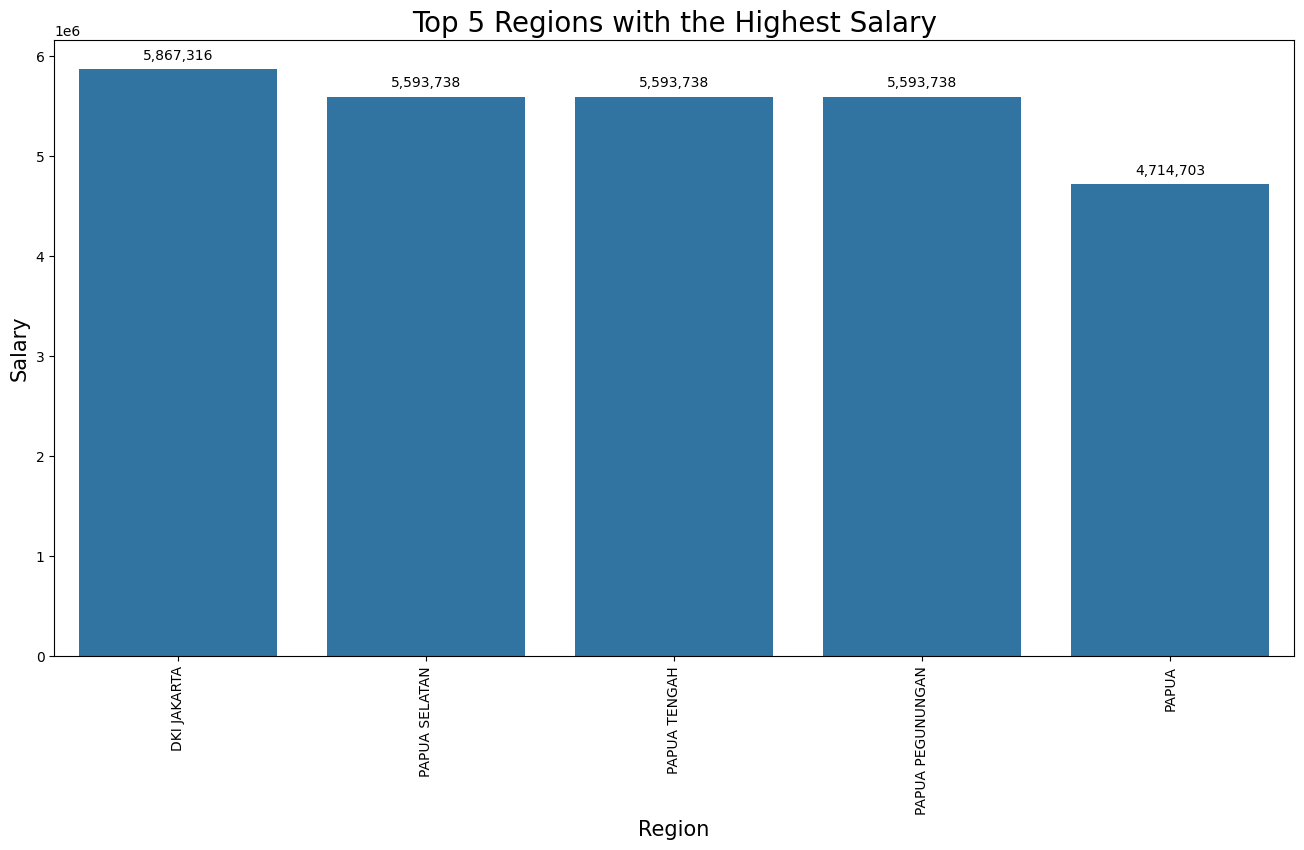

In [ ]:
top_5_regions = combined_df.groupby('REGION')['SALARY'].max().sort_values(ascending=False)[:5]
top_5_regions = top_5_regions.reset_index()



plt.figure(figsize = (16, 8))
graph = sns.barplot(x = 'REGION', y = 'SALARY', data=top_5_regions, order=top_5_regions['REGION'])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.title('Top 5 Regions with the Highest Salary', fontsize=20)

for index, row in top_5_regions.iterrows():
      graph.annotate(format(int(row['SALARY']), ','),
                   (row.name, row['SALARY']),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')